# Loading the Preprocessed Data

In [1]:
import os
import numpy as np

# Load the arrays
X_train = np.load('../Dataset/Train Test Dataset - Feature 8/X_train.npy')
X_test = np.load('../Dataset/Train Test Dataset - Feature 8/X_test.npy')
y_train = np.load('../Dataset/Train Test Dataset - Feature 8/y_train.npy')
y_test = np.load('../Dataset/Train Test Dataset - Feature 8/y_test.npy')

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Deep Learning Architecture - LSTM</h2>
    
</div>


# Importing Libraries - Architecture

In [2]:
import time
import tensorflow as tf
from keras.layers import LSTM
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

### Reshaping X_train for LSTM

In [3]:
X_train_array = X_train  
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

In [4]:
input_shape

(8, 1)

# 1. Network Initialization

In [5]:
batch_size = 700  
epochs = 500  
learning_rate = 0.001
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# 2. Define Architecture

In [6]:
lstm_model = Sequential([
    
    LSTM(512, input_shape=input_shape, activation='relu', return_sequences=True),
    Dropout(0.1), 
    LSTM(256, activation='relu'),
    Dropout(0.1),  
    Dense(1, activation='sigmoid')

])

In [7]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 512)            1052672   
                                                                 
 dropout (Dropout)           (None, 8, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,840,385
Trainable params: 1,840,385
Non-trainable params: 0
_________________________________________________________________


# 3. Model Compilation

In [8]:
lstm_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Fit Network

In [9]:
start_time = time.time()

history = lstm_model.fit(X_train_reshaped, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.1,
                         callbacks=[early_stopping], 
                         verbose=1)

end_time = time.time()

training_time = end_time - start_time
print("Training Time: ", training_time, "seconds")

Epoch 1/500
799/799 [==============================] - 345s 424ms/step - loss: 0.6428 - accuracy: 0.6245 - val_loss: 0.6267 - val_accuracy: 0.6391
Epoch 2/500
799/799 [==============================] - 346s 433ms/step - loss: 0.6103 - accuracy: 0.6566 - val_loss: 0.5931 - val_accuracy: 0.6706
Epoch 3/500
799/799 [==============================] - 345s 432ms/step - loss: 0.5824 - accuracy: 0.6795 - val_loss: 0.5683 - val_accuracy: 0.6898
Epoch 4/500
799/799 [==============================] - 345s 432ms/step - loss: 0.5514 - accuracy: 0.7009 - val_loss: 0.5314 - val_accuracy: 0.7122
Epoch 5/500
799/799 [==============================] - 344s 431ms/step - loss: 0.5201 - accuracy: 0.7217 - val_loss: 0.5004 - val_accuracy: 0.7334
Epoch 6/500
799/799 [==============================] - 345s 432ms/step - loss: 0.4850 - accuracy: 0.7441 - val_loss: 0.4640 - val_accuracy: 0.7568
Epoch 7/500
799/799 [==============================] - 345s 431ms/step - loss: 0.4507 - accuracy: 0.7662 - val_loss: 0

799/799 [==============================] - 20s 25ms/step - loss: 0.2429 - accuracy: 0.8900 - val_loss: 0.2995 - val_accuracy: 0.8672
Epoch 114/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2357 - accuracy: 0.8931 - val_loss: 0.2999 - val_accuracy: 0.8692
Epoch 115/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2377 - accuracy: 0.8920 - val_loss: 0.3015 - val_accuracy: 0.8681
Epoch 116/500
799/799 [==============================] - 19s 24ms/step - loss: 0.2346 - accuracy: 0.8937 - val_loss: 0.3017 - val_accuracy: 0.8690
Epoch 117/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2327 - accuracy: 0.8942 - val_loss: 0.3020 - val_accuracy: 0.8677
Epoch 118/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2327 - accuracy: 0.8948 - val_loss: 0.3028 - val_accuracy: 0.8695
Epoch 119/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2351 - accuracy: 0.8941 - val_loss: 0.2987 - val_ac

Epoch 169/500
799/799 [==============================] - 18s 23ms/step - loss: 0.2236 - accuracy: 0.9093 - val_loss: 0.2991 - val_accuracy: 0.8778
Epoch 170/500
799/799 [==============================] - 18s 23ms/step - loss: 0.2149 - accuracy: 0.9119 - val_loss: 0.3086 - val_accuracy: 0.8750
Epoch 171/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1998 - accuracy: 0.9132 - val_loss: 0.2951 - val_accuracy: 0.8799
Epoch 172/500
799/799 [==============================] - 20s 25ms/step - loss: 0.1963 - accuracy: 0.9145 - val_loss: 0.2963 - val_accuracy: 0.8793
Epoch 173/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1937 - accuracy: 0.9150 - val_loss: 0.2983 - val_accuracy: 0.8796
Epoch 174/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1903 - accuracy: 0.9164 - val_loss: 0.2913 - val_accuracy: 0.8816
Epoch 175/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1911 - accuracy: 0.9163 - val_loss: 0

# Saving the model and training history 

In [10]:
lstm_model.save('LSTM_Architecture_8_Features.h5')
np.save('LSTM_history_8_Features.npy', history.history)

# 5. Model Evaluation

# Importing Libraries - Evaluation

In [11]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Plotting Loss and Accuracy Curve

### Loss Curve

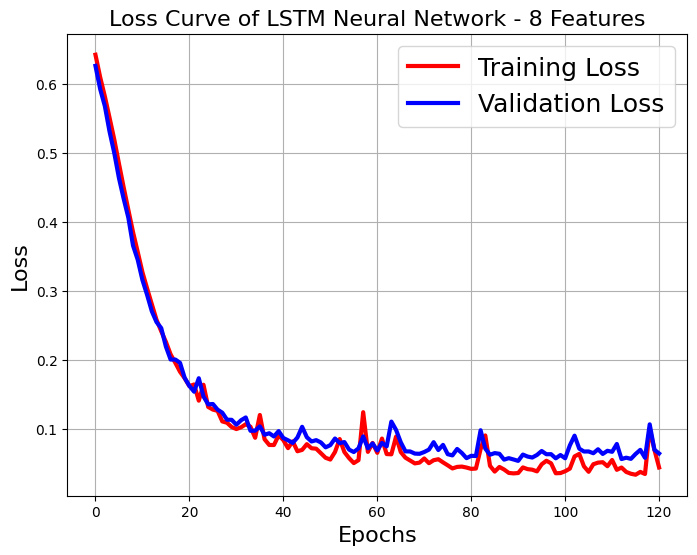

In [12]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.title('Loss Curve of LSTM Neural Network - 8 Features', fontsize=16)

plt.grid(True)
plt.show()

### Accuracy Curve

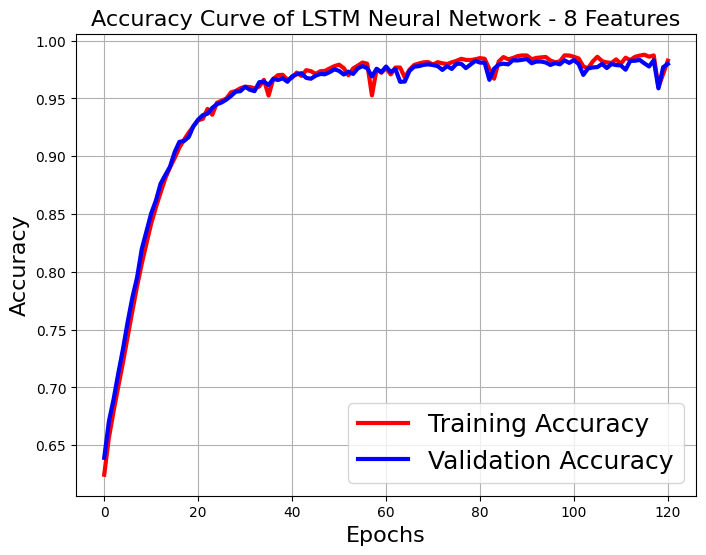

In [13]:
plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.title('Accuracy Curve of LSTM Neural Network - 8 Features', fontsize=16)

plt.grid(True)
plt.show()

### Reshaping X_test for LSTM Model Evaluation

In [16]:
X_test_array = X_test
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

In [17]:
X_test_reshaped

array([[[ 0.46349357],
        [ 0.36358773],
        [ 3.37428511],
        ...,
        [ 1.19729591],
        [ 0.51350794],
        [ 0.27797617]],

       [[-3.12902325],
        [-2.41096786],
        [-4.83420457],
        ...,
        [-3.49186801],
        [-2.52117481],
        [-1.38013389]],

       [[ 1.56338732],
        [ 1.49249955],
        [ 1.91877559],
        ...,
        [ 1.09955917],
        [ 0.67026206],
        [ 0.76520671]],

       ...,

       [[ 0.69592067],
        [ 0.84838968],
        [-0.60272074],
        ...,
        [ 0.58434382],
        [ 0.11607025],
        [ 0.67028264]],

       [[ 2.17107007],
        [ 2.96016373],
        [ 3.46610892],
        ...,
        [ 2.4330017 ],
        [ 1.85676497],
        [ 1.06099164]],

       [[ 0.16525652],
        [-0.05828783],
        [-0.23818711],
        ...,
        [ 0.38970464],
        [-0.59518656],
        [-0.2390997 ]]])

###  Make predictions on test data

In [18]:
y_pred_prob = lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to classes

4853/4853 [==============================] - 80s 16ms/step


# Classification Report

In [19]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

Test accuracy: 0.98, Test loss: 0.06


In [20]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     77676
           1       0.99      0.98      0.98     77614

    accuracy                           0.98    155290
   macro avg       0.98      0.98      0.98    155290
weighted avg       0.98      0.98      0.98    155290



# Confusion Matrix

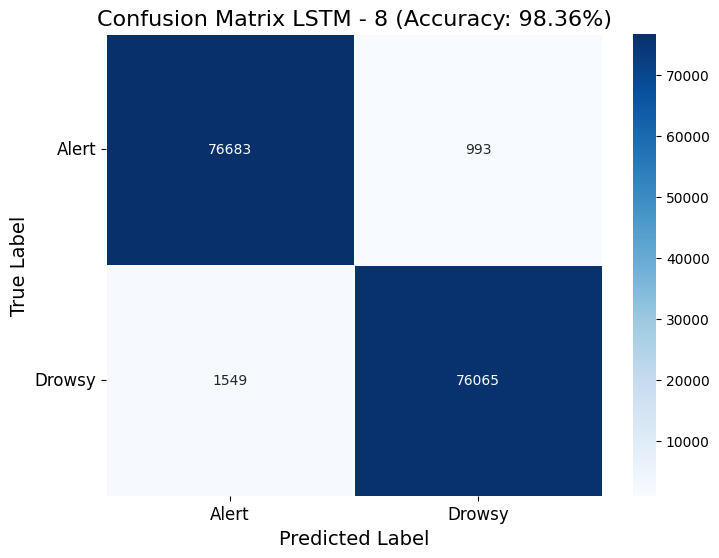

In [21]:
class_labels = ["Alert", "Drowsy"]

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Confusion Matrix LSTM - 8 (Accuracy: {accuracy:.2f}%)', fontsize=16)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(rotation=0, fontsize=12)  

plt.show()

# Evaluation Metrics

In [22]:
# Calculate accuracy, precision, recall, F1-score, AUC-ROC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9836306265696438
Precision: 0.9871136027407926
Recall: 0.9800422604169351
F1-score: 0.9835652218889004
AUC-ROC: 0.9978720336713843


# Receiver Operating Characteristic (ROC) Curve

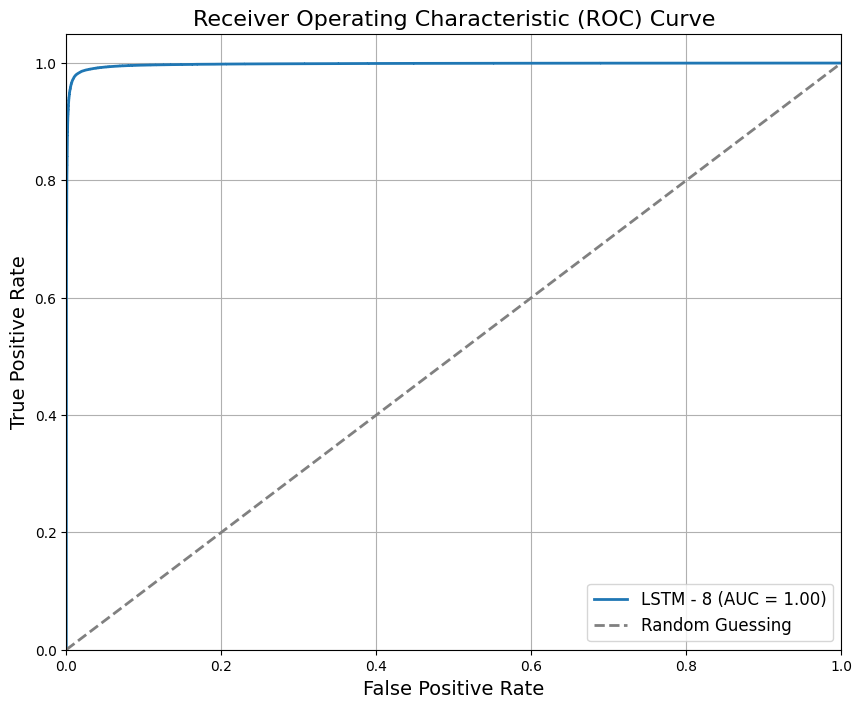

In [23]:
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_data['LSTM - 8'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curves 
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()